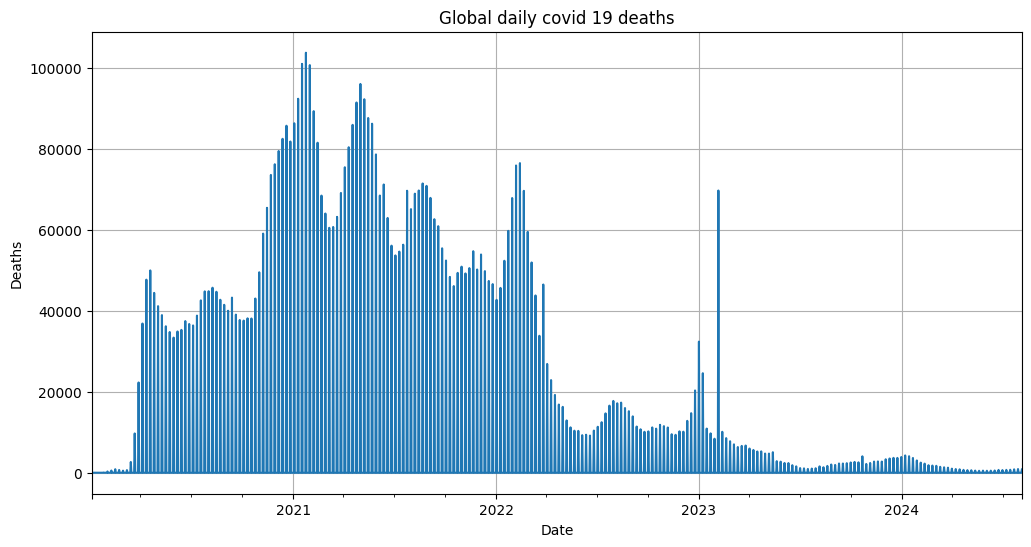

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv(r"C:\Users\sarvesh\Downloads\owid-covid-data.csv")

df.head()

df= df[df['continent'].notnull()]

df.isnull().sum()
df['date']= pd.to_datetime(df['date'])

df= df[['date', 'location', 'continent', 'total_deaths', 'new_deaths', 'population']]

df.dropna(subset=['total_deaths'],inplace=True)


#Total deaths by country
total_deaths= df.groupby('location')['total_deaths'].max().sort_values(ascending=False)

#Deaths per 100k population
df['deaths_per_100k']= (df['total_deaths']/df['population'])*100000

#global daily deaths trend
daily_deaths= df.groupby('date')['new_deaths'].sum()

plt.figure(figsize=(12,6))
daily_deaths.plot()
plt.title("Global daily covid 19 deaths")
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.grid()
plt.show()

df.to_csv('cleaned_covid_deaths.csv', index=False)



